<a href="https://colab.research.google.com/github/jeffreygalle/MAT421/blob/main/ModuleB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.1 Interpolation Problem Statement

**What?:** You have a set of data points. Each data point consists of two values: an independent variable *x*<sub>*i*</sub> and a dependent variable *y*<sub>*i*</sub>.

**Mission**: Find a function that fits the dataset. The function should pass through every point in the dataset.

**How? Interpolation**: Interpolation is the estimation of the *y* value for a given *x* value in the dataset.

**Why?**: Useful when you have discrete data points and want to estimate values at points in between those values.

# 17.2 Linear Interpolation

Linear interpolation is one of the interpolation methods, it's used to estimate a value within a range based on two known values.

In linear interpolation, it is assumed that the relationship between the two known values is  linear and forms a straight line.

<ipython-input-5-7df037ca0877>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


2.5


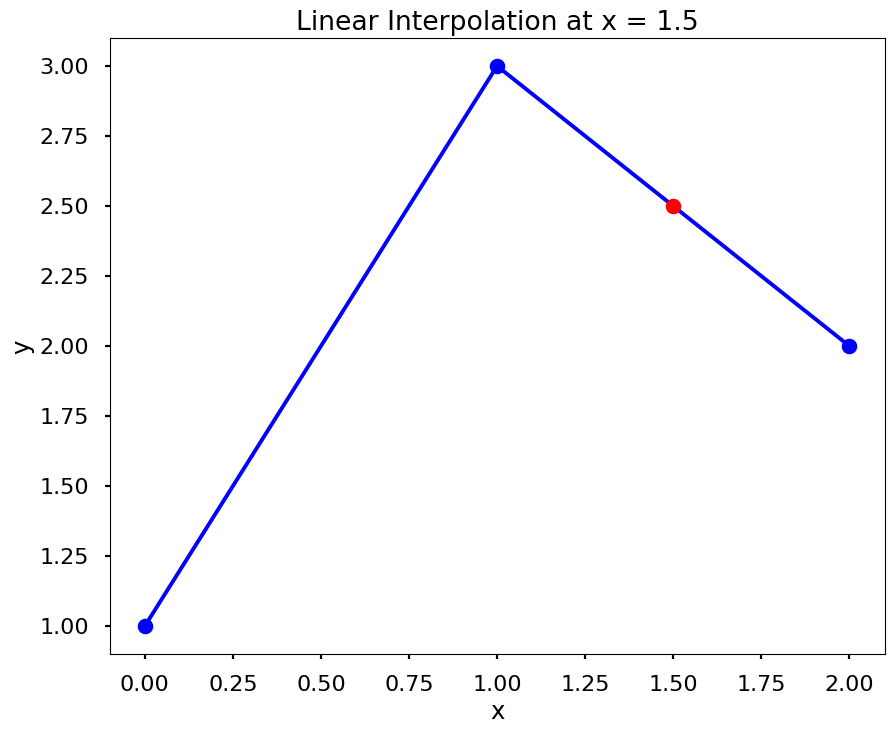

In [ ]:
# Example
"""
Demonstrates example of linear interpolation. It estimates a new y value for a
given x based on the linear relationship between known data points.
"""
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-poster")

# Arrays representing known data points
x = np.array([0, 1, 2])
y = np.array([1, 3, 2])

f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)

plt.figure(figsize = (10,8))
plt.plot(x, y, "-ob")
plt.plot(1.5, y_hat, "ro")
plt.title("Linear Interpolation at x = 1.5")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



In [2]:
"""
Write a function my_lin_interp(x, y, X) where x and y are arrays that contain
experimental data points, and X is an array. Assume that x and X are in
ascending order and have unique elements. The output argument, Y, should be an
array the same size as X, where Y[i] is the linear interpolation of X[i].
"""
import numpy as np

def my_lin_interp(x, y, X):

    # searchsorted finds where each element in X should be inserted into x to
    # maintain sorted order
    idx = np.searchsorted(x, X)

    #Extract the x and y-values of the two closest points
    x1, x2 = x[idx - 1], x[idx]
    y1, y2 = y[idx - 1], y[idx]

    # Linear interpolation formula: calculates the interpolated values
    Y = y1 + (X - x1) * (y2 - y1) / (x2 - x1)

    return Y

# Example usage:
x_exp = np.array([0, 1, 2])
y_exp = np.array([1, 3, 2])
X_interp = np.array([1.5])

# Perform linear interpolation
Y_interp = my_lin_interp(x_exp, y_exp, X_interp)

# Print the results
print("Interpolated Values:", Y_interp)


Interpolated Values: [2.5]


# 17.3 Cubic Spline Interpolation

Cubic spline interpolation is another method for creating a smooth curve that passes through a given set of points. The curve is represented by a set of piecewise cubic functions, and each cubic function is defined over a specific interval.

In [ ]:
#Code example
"""
Use CubicSpline to plot the cubic spline interpolation of the dataset
x = [0, 1, 2] andy = [1, 3, 2]for 0≤x ≤2.
"""
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-poster")
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = "natural" adds the constraints
f = CubicSpline(x, y, bc_type="natural")
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, "b")
plt.plot(x, y, "ro")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4. Think of a circumstance where using the nearest neighbor interpolation would be superior to cubic spline interpolation.

*   Nearest neighbor interpolation:
Simply assigns the value of the nearest data point to the point being interpolated, and the interpolated value is that closest data point.
*   Cubic spline interpolation:
Piecewise cubic polynomials are used to interpolate between data points.

Nearest neighbor interpolation is less expensive computationally than cubic spline interpolation. If the data is large and efficency is a key metric, nearest neighbor may be more suitable.